In [2]:
# load libraries
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_score,
)
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage

In [3]:
# define fp for data
fp = "/home/cheyanne/github_repos/CPBS7602/assignment01/data/tpm_5kgenes_10tissues_formatted.csv"

In [4]:
# load data
data = pd.read_csv(fp, index_col=0)

In [5]:
# get data shape and head
print(data.shape)
print(data.head())

(12385, 5000)
                ENSG00000244734.3  ENSG00000210082.2  ENSG00000198804.2  \
Adipose Tissue              452.7             6310.0            10790.0   
Muscle                      225.7            10200.0            33610.0   
Blood Vessel                269.6             6111.0             9689.0   
Blood Vessel               5272.0            11990.0             4269.0   
Heart                      1617.0            40440.0            56700.0   

                ENSG00000198712.1  ENSG00000198938.2  ENSG00000188536.12  \
Adipose Tissue            11720.0            19890.0              102.40   
Muscle                    37500.0            62560.0               52.01   
Blood Vessel              12250.0            19450.0               62.95   
Blood Vessel              10630.0            16440.0             1323.00   
Heart                     39220.0            64660.0              403.50   

                ENSG00000198899.2  ENSG00000198886.2  ENSG00000275896.5  \
Adi

In [6]:
# define labels as the unique values in the index
ulabels = data.index.unique()
print(f' Clusters are {ulabels}')

 Clusters are Index(['Adipose Tissue', 'Muscle', 'Blood Vessel', 'Heart', 'Skin', 'Brain',
       'Lung', 'Esophagus', 'Colon', 'Blood'],
      dtype='object')


In [7]:
# define ground truth clusters and objects 
true_clusters = ulabels.shape[0]
print(f'True clusters: {true_clusters}')

True clusters: 10


In [8]:
# define the number of value counts per label 
n_labels = data.index.value_counts()
print('Objects by cluster are:')
print(n_labels)

Objects by cluster are:
Brain             2642
Skin              1809
Esophagus         1445
Blood Vessel      1335
Adipose Tissue    1204
Blood              929
Heart              861
Muscle             803
Colon              779
Lung               578
Name: count, dtype: int64


In [ ]:
#standardize the data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

/home/cheyanne/miniconda3/envs/cpbs_7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score for K=6: 0.18924192110804475


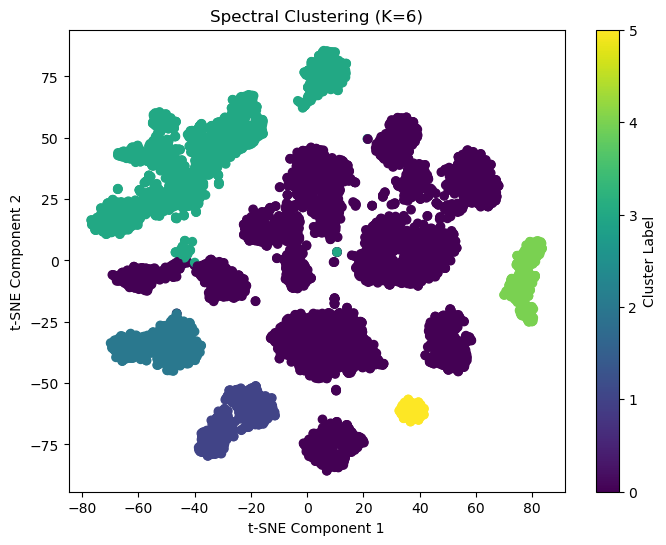

/home/cheyanne/miniconda3/envs/cpbs_7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score for K=7: 0.20439658071709674


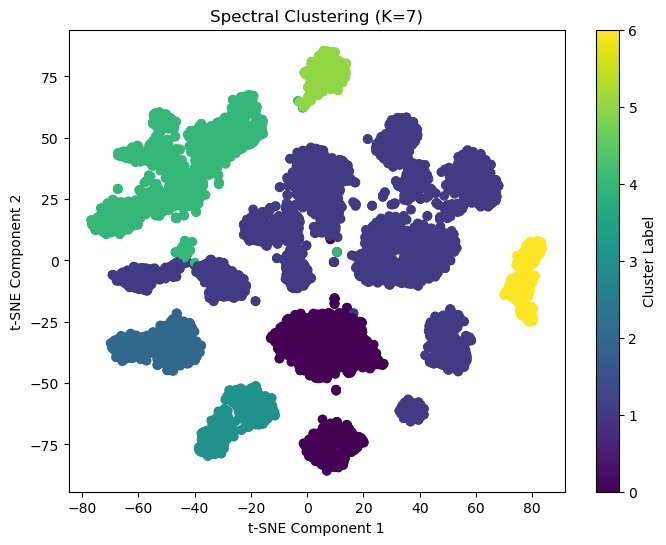

/home/cheyanne/miniconda3/envs/cpbs_7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score for K=8: 0.18805551744398408


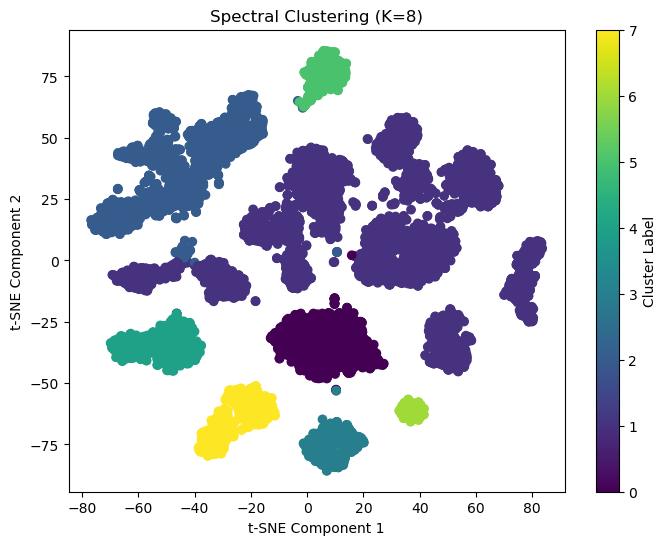

/home/cheyanne/miniconda3/envs/cpbs_7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score for K=9: 0.18735292334857104


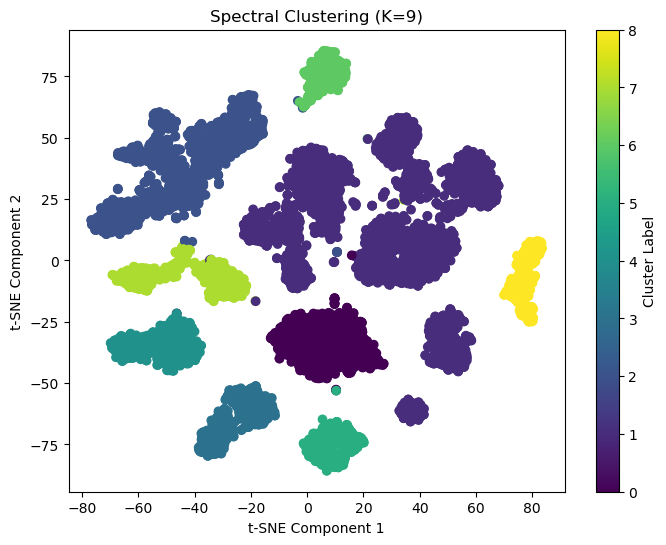

/home/cheyanne/miniconda3/envs/cpbs_7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score for K=10: 0.17826308138862917


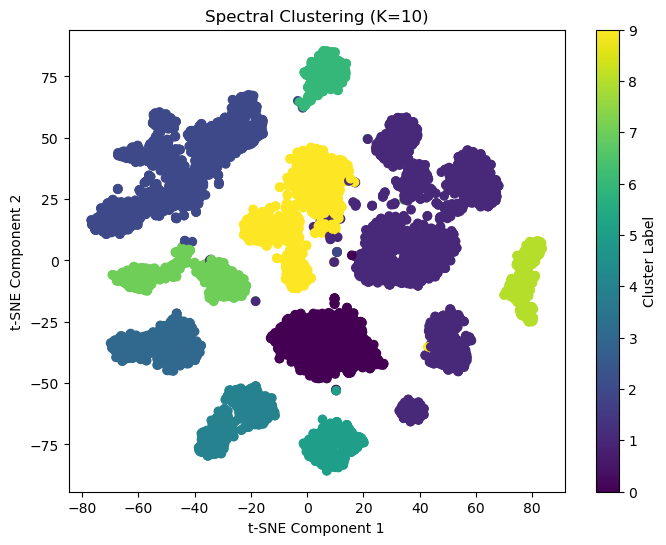

/home/cheyanne/miniconda3/envs/cpbs_7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score for K=11: 0.19044972164299817


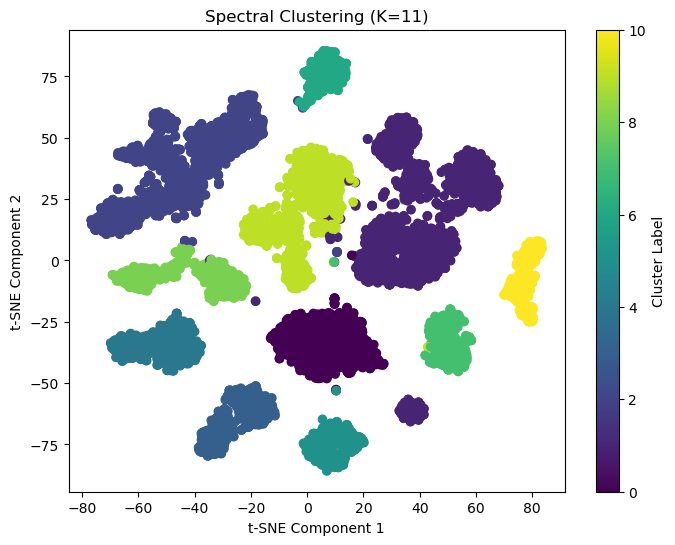

/home/cheyanne/miniconda3/envs/cpbs_7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score for K=12: 0.20051965248599402


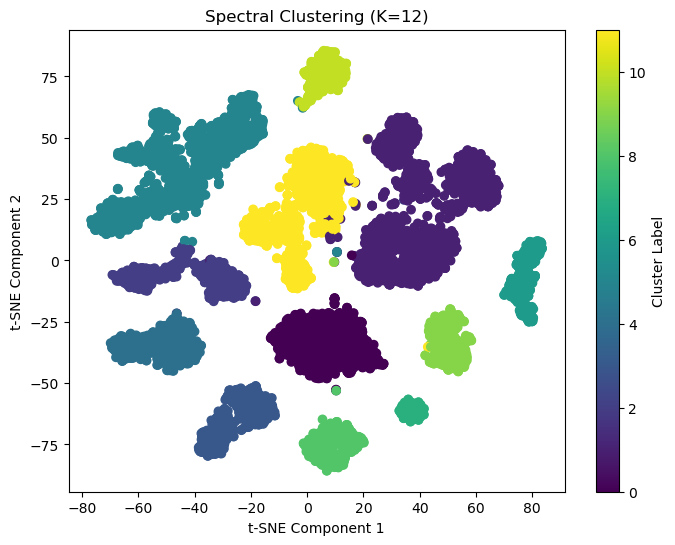

/home/cheyanne/miniconda3/envs/cpbs_7602/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score for K=13: 0.1984659004731048


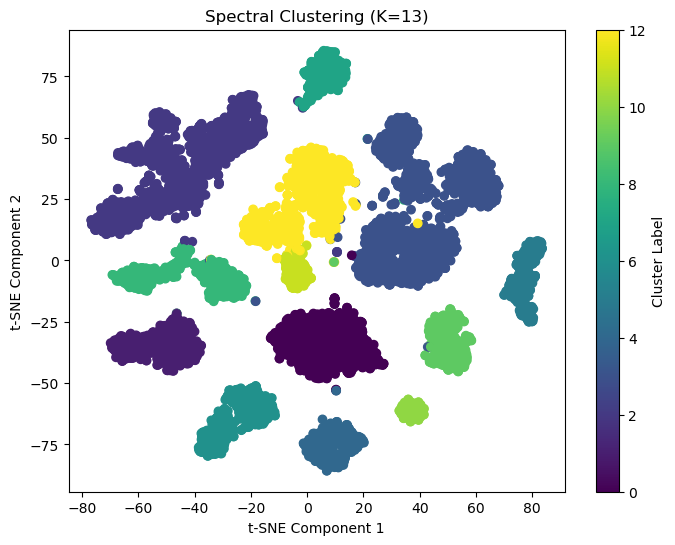

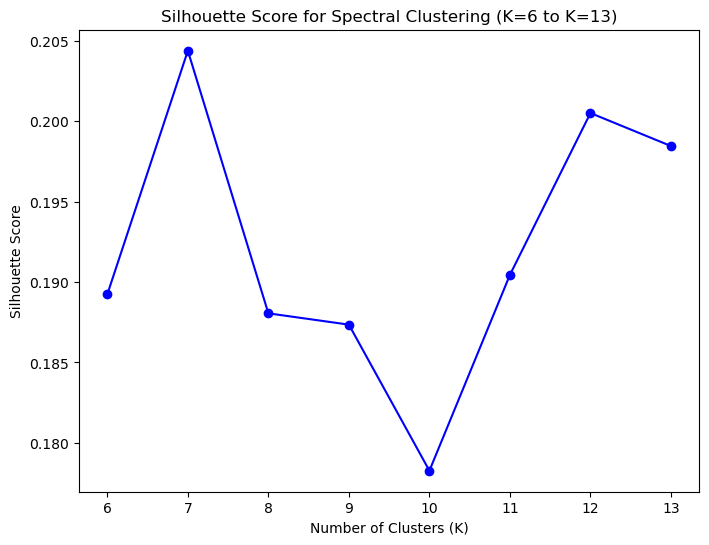

In [ ]:
# Range for number of clusters (K) from 6 to 14
Ks = range(6, 14)

# Store silhouette scores for each K
silhouette_scores = []

# Loop through each value of K
for k in Ks:
    # Apply Spectral Clustering
    spectral_clustering = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
    labels = spectral_clustering.fit_predict(data_scaled)  # Assuming `data_scaled` is your scaled data

    # Calculate the silhouette score for clustering quality
    sil_score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(sil_score)
    print(f"Silhouette Score for K={k}: {sil_score}")

    # Visualize the clustering using t-SNE 
    tsne = TSNE(n_components=2, random_state=42)
    data_tsne = tsne.fit_transform(data_scaled)

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis')
    plt.title(f"Spectral Clustering (K={k})")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.colorbar(label="Cluster Label")
    plt.show()

# Plot silhouette scores for different K values
plt.figure(figsize=(8, 6))
plt.plot(Ks, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Spectral Clustering (K=6 to K=13)")
plt.show()